<a href="https://colab.research.google.com/github/Sayali-1902/Litmus-Test-WP25/blob/master/250380_Sayali_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

You are provided with a dataset available in the Google Drive folder at the following link:
https://drive.google.com/drive/folders/1NB2zIk679jlZC1x0gZPS4ugfHIO1aq1p

The dataset contains information related to social network advertisements, including user attributes such as age and estimated salary, along with a binary target variable indicating whether a user purchased the advertised product or not.

The goal is to build a Logistic Regression classification model to predict whether a user will purchase the advertised product based on their Age and Estimated Salary.

Perform the following tasks:

## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

## Importing the dataset

In [4]:
df = pd.read_csv("Social_Network_Ads.csv")
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


## Select Features and Target Variable



In [5]:
X = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

## Feature Scaling

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Splitting the dataset into the Training set and Test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Logistic Regression model on the Training set

In [8]:
lr_model = LogisticRegression(solver="liblinear", class_weight='balanced')

lr_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

## Predicting the Test set results

In [9]:
y_pred = lr_model.predict(X_test)

## Making the Confusion Matrix

Accuracy score: 0.9125


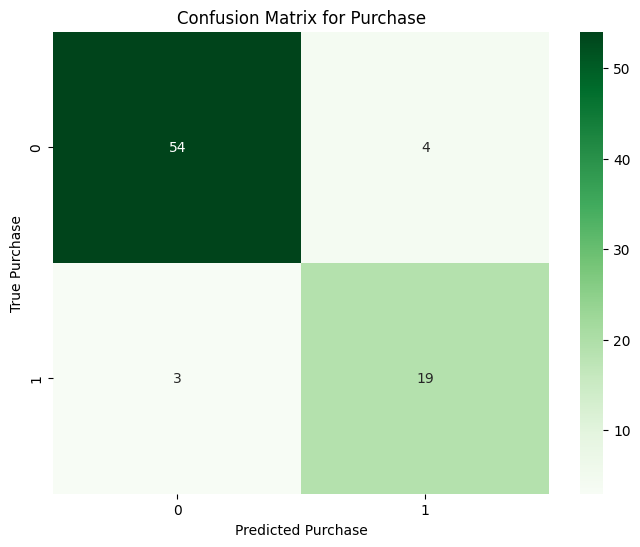

In [10]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Accuracy score:", acc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel("Predicted Purchase")
plt.ylabel("True Purchase")
plt.title("Confusion Matrix for Purchase")
plt.show()

## Visualising the Training set results

In [11]:
X_set, y_set = scaler.inverse_transform(X_train), y_train

In [12]:
X1, X2 = np.meshgrid( np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 0.25), np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 0.25))
X1 = X1.astype(np.float32)
X2 = X2.astype(np.float32)

In [13]:
Z = lr_model.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
Z = Z.reshape(X1.shape)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


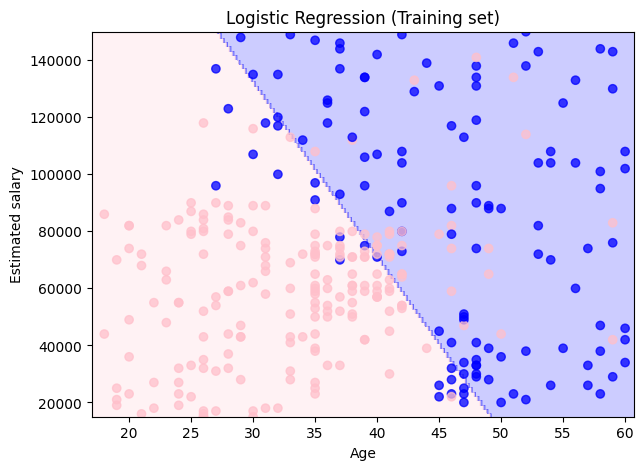

In [14]:
plt.figure(figsize=(7,5))
plt.contourf(X1, X2, Z, alpha=0.2, cmap=ListedColormap(("pink", "blue")))


plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(("pink", "blue")), alpha = 0.75)
plt.title("Logistic Regression (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.show()

## Visualising the Test set results

In [15]:
X_set1, y_set1 = scaler.inverse_transform(X_test), y_test
X3, X4 = np.meshgrid( np.arange(X_set1[:, 0].min() - 1, X_set1[:, 0].max() + 1, 0.25), np.arange(X_set1[:, 1].min() - 1, X_set1[:, 1].max() + 1, 0.25))

In [16]:
Z1 = lr_model.predict(scaler.transform(np.array([X3.ravel(), X4.ravel()]).T)).reshape(X3.shape)
Z1 = Z1.reshape(X3.shape)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


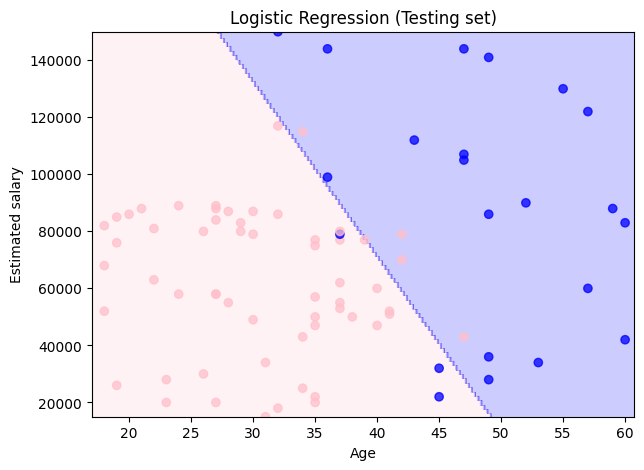

In [17]:
plt.figure(figsize=(7,5))
plt.contourf(X3, X4, Z1, alpha=0.2, cmap=ListedColormap(("pink", "blue")))


plt.scatter(X_set1[:, 0], X_set1[:, 1], c=y_set1, cmap=ListedColormap(("pink", "blue")), alpha = 0.75)
plt.title("Logistic Regression (Testing set)")
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.show()